In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2024-08-15 08:32:51.110881: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-15 08:32:51.110933: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 08:32:51.112419: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2024-08-15 08:33:09.257736: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2175: 3.31527, expected 2.86333
2024-08-15 08:33:09.257846: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8832: 3.04387, expected 2.59193
2024-08-15 08:33:09.257858: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8960: 3.285, expected 2.83305
2024-08-15 08:33:09.257871: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9600: 3.16471, expected 2.71277
2024-08-15 08:33:09.257891: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12032: 3.08921, expected 2.63726
2024-08-15 08:33:09.257915: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 15360: 3.30205, expected 2.8501
2024-08-15 08:33:09.258031: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32768: 4.65504, expected 3.81534
2024-08-15 08:33:09.258053: E exte

   5/2197 ━━━━━━━━━━━━━━━━━━━━ 57s 26ms/step - accuracy: 0.0136 - loss: 10.8657      

I0000 00:00:1723710798.351722     408 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2195/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3408 - loss: 2.4804

2024-08-15 08:34:14.972133: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.66617, expected 2.76772
2024-08-15 08:34:14.972200: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 6.55022, expected 5.65177
2024-08-15 08:34:14.972217: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 5.72873, expected 4.83028
2024-08-15 08:34:14.972237: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.25233, expected 5.35388
2024-08-15 08:34:14.972252: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.63001, expected 4.73156
2024-08-15 08:34:14.972264: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 4.79245, expected 3.89401
2024-08-15 08:34:14.972276: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 4.67102, expected 3.77258
2024-08-15 08:34:14.972297: E external/local_xla/xla/se

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3410 - loss: 2.4796

2024-08-15 08:34:31.452179: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98304: 4.2055, expected 3.46583
2024-08-15 08:34:31.452235: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98308: 5.0598, expected 4.32013
2024-08-15 08:34:31.452246: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98309: 5.15094, expected 4.41127
2024-08-15 08:34:31.452254: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98310: 5.6654, expected 4.92573
2024-08-15 08:34:31.452263: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98311: 4.73688, expected 3.9972
2024-08-15 08:34:31.452272: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98312: 4.39242, expected 3.65274
2024-08-15 08:34:31.452280: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 98313: 4.40308, expected 3.6634
2024-08-15 08:34:31.452289: E ex

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 89s 34ms/step - accuracy: 0.3410 - loss: 2.4792 - val_accuracy: 0.5963 - val_loss: 1.4506
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 118s 28ms/step - accuracy: 0.7567 - loss: 0.8235 - val_accuracy: 0.8679 - val_loss: 0.4215
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 62s 28ms/step - accuracy: 0.8626 - loss: 0.4355 - val_accuracy: 0.8148 - val_loss: 0.5952
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 62s 28ms/step - accuracy: 0.8938 - loss: 0.3384 - val_accuracy: 0.9157 - val_loss: 0.2706
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9176 - loss: 0.2580 - val_accuracy: 0.8320 - val_loss: 0.5964
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 63s 28ms/step - accuracy: 0.8957 - loss: 0.3661 - val_accuracy: 0.9348 - val_loss: 0.2215
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 62s 28ms/step - accuracy: 0.9376 - loss: 0.1971 - val_accuracy: 0.9379 - val_loss: 0.2215
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 63s 28ms/step - accuracy: 0.9514 - loss: 0.1

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.9706 - loss: 0.0939
Training accuracy: 0.9721317291259766


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9358 - loss: 0.2303
Validation accuracy: 0.9328477382659912


In [20]:
cnn.save('trained_plant_disease_model.keras')

In [21]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5446048974990845,
  0.8115370869636536,
  0.8819119334220886,
  0.9113877415657043,
  0.9281741380691528,
  0.9354007840156555,
  0.9502525329589844,
  0.9556867480278015,
  0.9586741328239441,
  0.9640514850616455],
 'loss': [1.6257610321044922,
  0.6211404800415039,
  0.4512377083301544,
  0.3080611824989319,
  0.29795292019844055,
  0.3257322311401367,
  0.18835654854774475,
  0.25038281083106995,
  0.16155879199504852,
  0.24640168249607086],
 'val_accuracy': [0.5962895750999451,
  0.8679148554801941,
  0.8148190379142761,
  0.9157181978225708,
  0.8320054411888123,
  0.9347826242446899,
  0.9379125833511353,
  0.9387662410736084,
  0.9458798170089722,
  0.9328477382659912],
 'val_loss': [1.4505966901779175,
  0.42147812247276306,
  0.5951864719390869,
  0.27058500051498413,
  0.5964402556419373,
  0.2214970886707306,
  0.221455380320549,
  0.21985264122486115,
  0.18077531456947327,
  0.23948141932487488]}

In [22]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


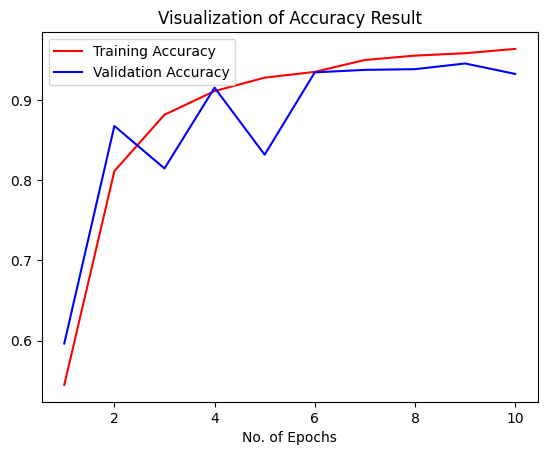

In [24]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [25]:
class_name = validation_set.class_names

In [26]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [27]:
y_pred = cnn.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step


(array([[9.9983203e-01, 1.5706749e-04, 3.9744648e-08, ..., 4.1054755e-14,
         5.5999747e-13, 2.5922212e-14],
        [9.9738473e-01, 1.1488243e-05, 7.3505941e-12, ..., 3.0986834e-12,
         4.5425480e-13, 2.6758099e-13],
        [1.0000000e+00, 1.1365503e-09, 4.5445016e-11, ..., 2.4427873e-21,
         2.5728969e-18, 1.7394563e-17],
        ...,
        [4.4264232e-12, 3.2049095e-15, 8.3917839e-13, ..., 4.4165537e-13,
         1.1459461e-14, 9.9999952e-01],
        [3.1834655e-15, 4.9088304e-19, 1.7912126e-16, ..., 1.9546716e-17,
         4.7488128e-17, 1.0000000e+00],
        [2.5482920e-18, 2.8011207e-19, 2.8376135e-18, ..., 1.1631373e-19,
         1.0310691e-18, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [28]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [29]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [30]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [31]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [32]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [48]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.91      0.94      0.93       504
                                 Apple___Black_rot       0.98      0.93      0.95       497
                          Apple___Cedar_apple_rust       0.97      0.95      0.96       440
                                   Apple___healthy       0.97      0.83      0.89       502
                               Blueberry___healthy       0.97      0.93      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.91      0.99      0.95       421
                 Cherry_(including_sour)___healthy       0.98      0.95      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.88      0.90       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.89      0.96      0.

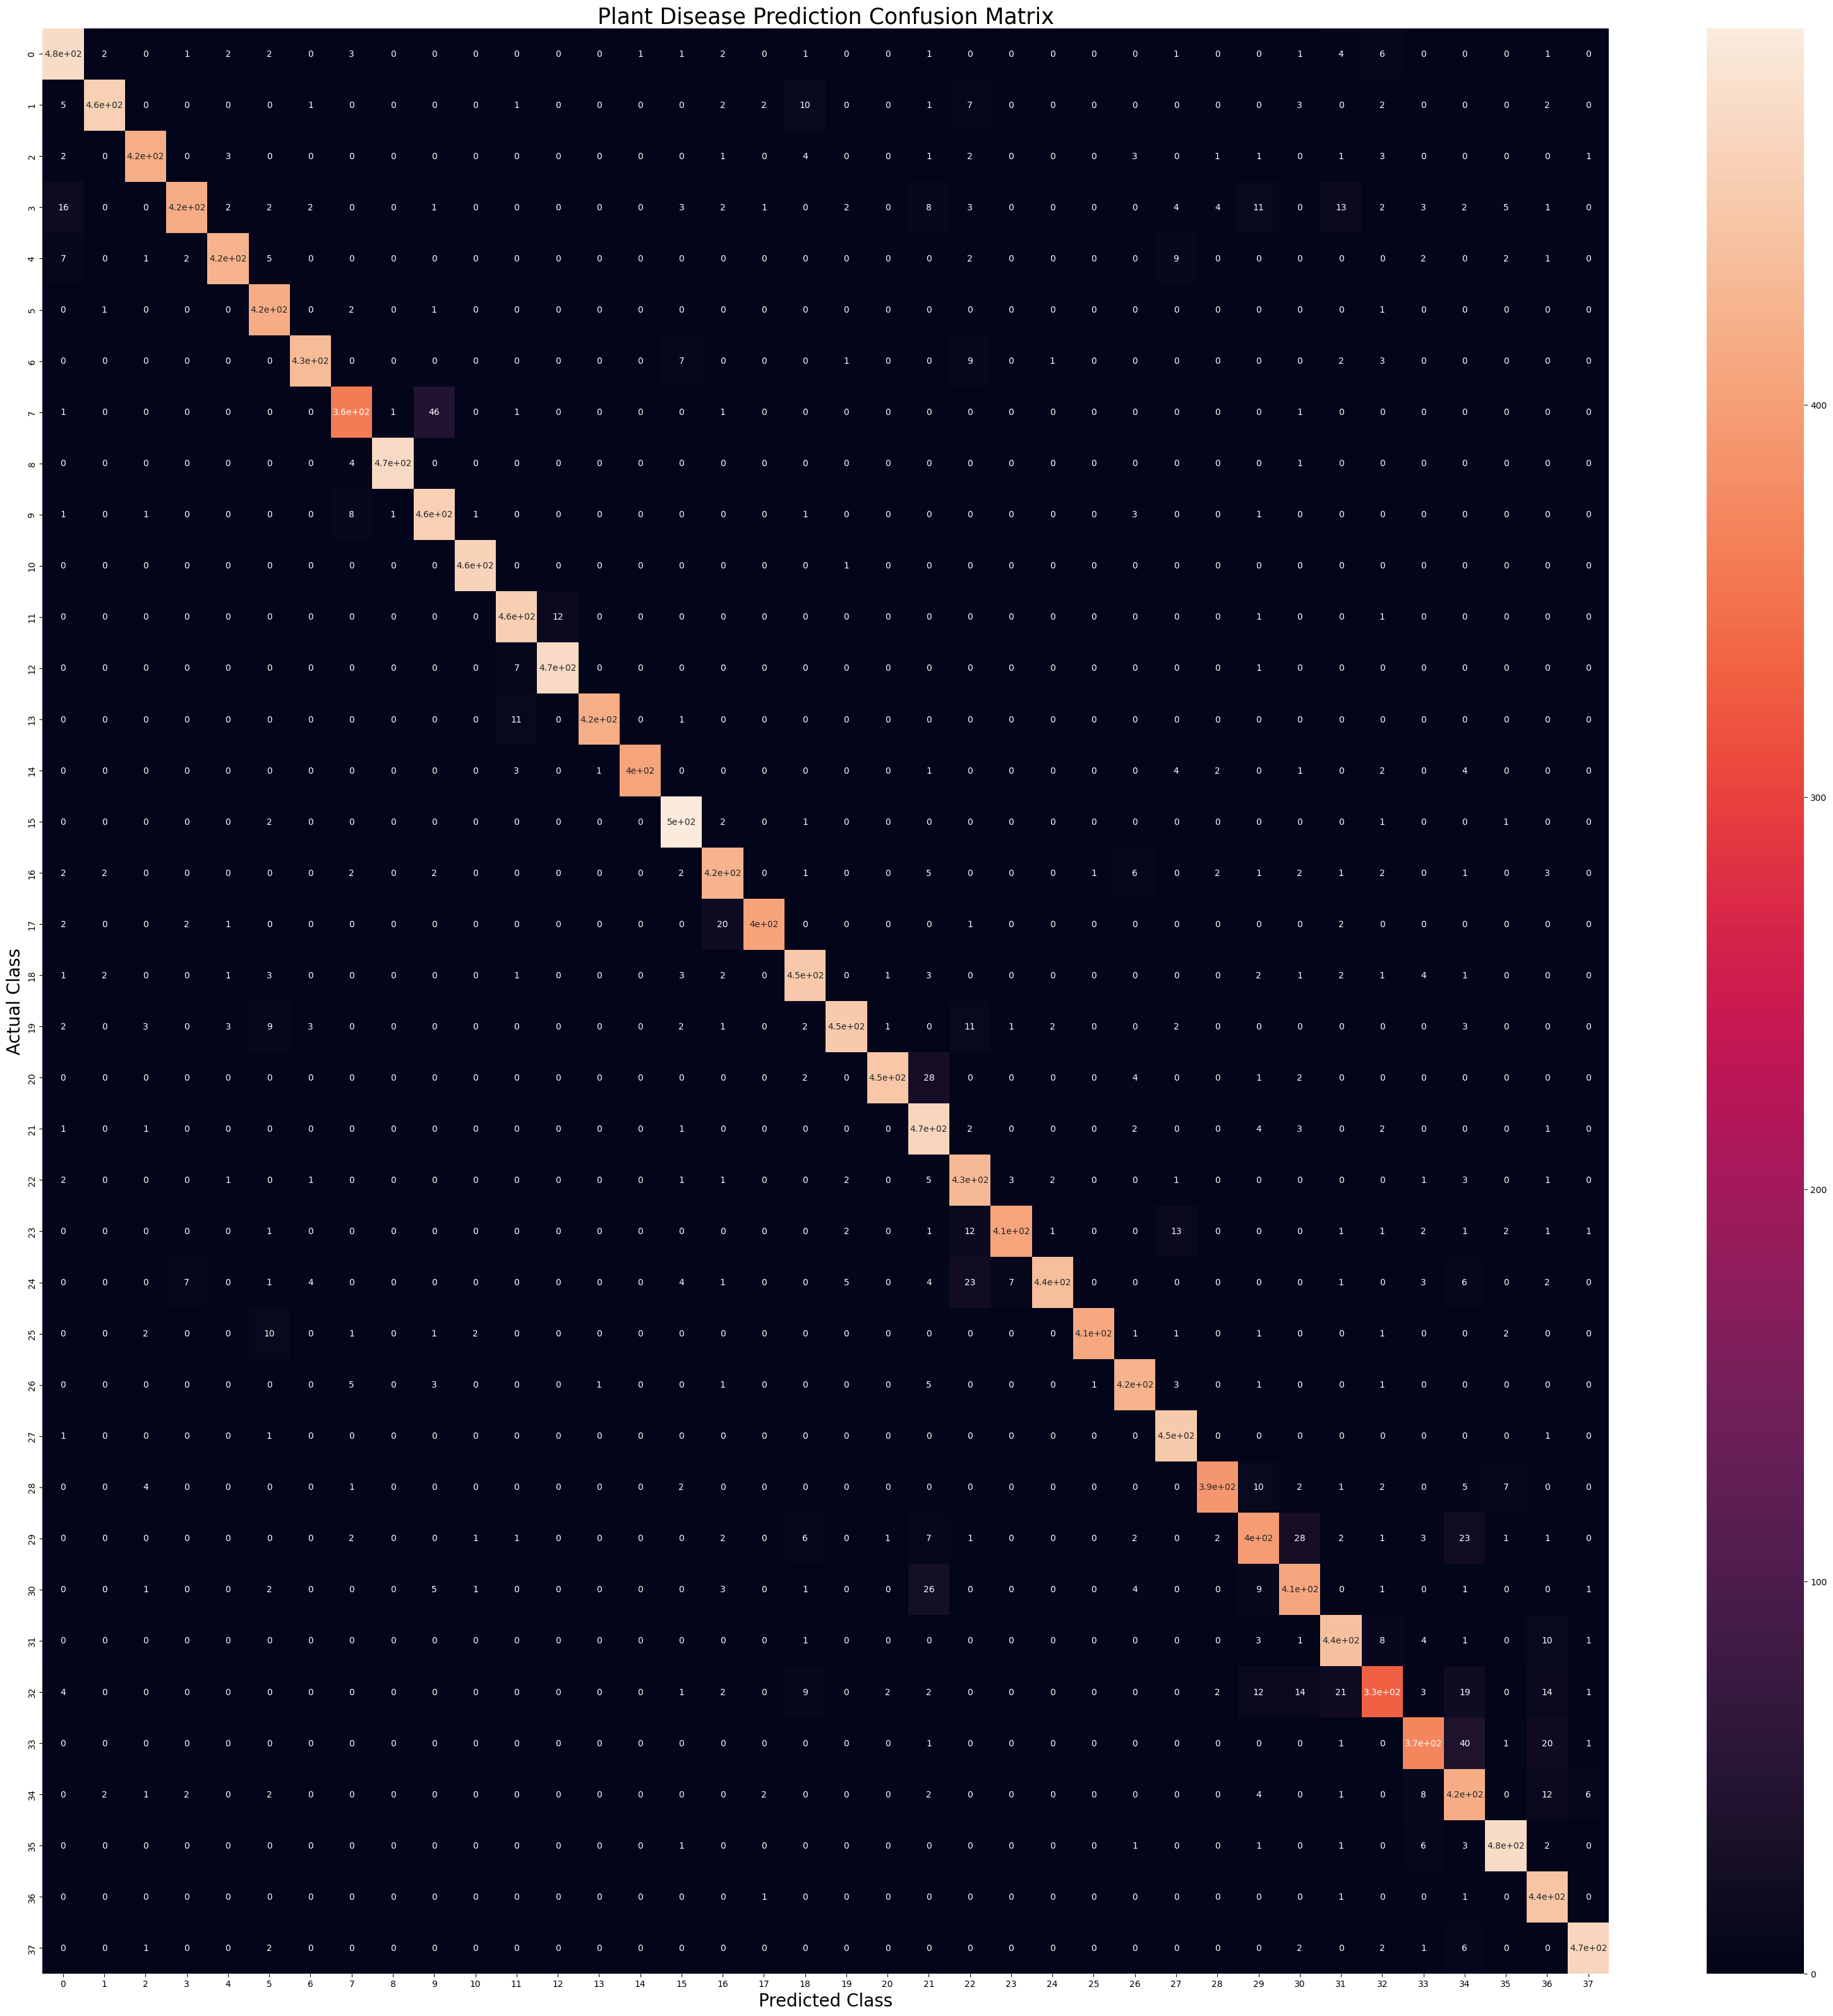

In [49]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

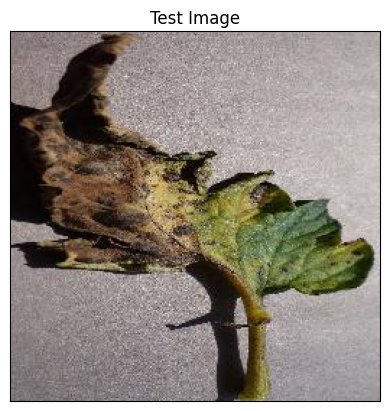

In [68]:
#Test Image Visualization
import cv2
image_path = '/kaggle/input/new-plant-diseases-dataset/test/test/TomatoLateBlight.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [60]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [66]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

print(f"Predicted class: {model_prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Tomato___Late_blight


In [69]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9360 - loss: 0.2298
Validation accuracy: 0.9328477382659912


In [70]:
predictions
print(f"Predicted class index: {result_index}")
print(f"Predicted class name: {model_prediction}")

Predicted class index: 30
Predicted class name: Tomato___Late_blight


In [71]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

30


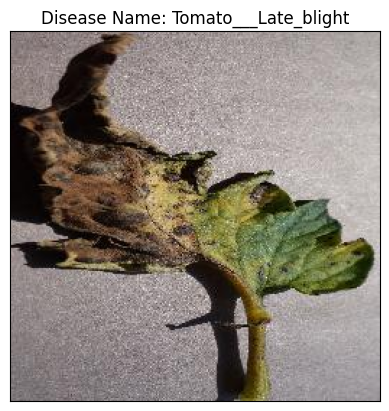

In [72]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()